# Capstone Project - The Battle of the Neighborhoods (Week 2)

## Applied Data Science Capstone by IBM through Coursera

## Introduction: Business Problem

Attending college is a significant part in a lot of individuals’ lives, whether they're attending for the first time or returning. Going to college can bring about a lot of stress due to tuition, courses, being in a new environment and much more. One of the biggest concerns when going off to college is, where are you going to live? This is a significant concern because expenses can be too much for families or an individual to bear along with additional expenses such as tuition, parking, school suppilies, etc. For those attending college, saving as much money as possible is a significant goal itself, outside of receiving a degree.

For my project, I will focus on identifying the most cost-efficient neighborhoods around the University of Washington within the city of Seattle for incoming students who are interested in living off campus. This analysis will provide an informative outlook on the many neighborhoods that are within a four mile radius (North, South, East, West) of the UW Medical Center/UWSOM on campus.

## Data

Using the definition of the business problem as a basis for this analysis and decision process, these factors will be taken under consideration:

- Average rental cost in each respective neighborhood.
- The total crimes committed within each respective neighborhood.
- The type of venues that are provided within each neighborhood.

The data used for this project will be the following:

- The neighborhoods I will be focusing on will be the neighborhoods suggested from the University of Washingtons' (https://blogs.uw.edu/esom/seattle-living/housing-neighborhoods/).
- I will be also collecting current average rental costs of the neighborhoods from a webpage that focuses on current rental market trends within the Seattle Area. (https://www.rentcafe.com/average-rent-market-trends/us/wa/seattle/)
- To find the total crimes committed within each neighborhood, I will be using the crime dataset provided by the Seattle government website. (https://data.seattle.gov/Public-Safety/Crime-Data/4fs7-3vj5/data)
- The venues within each neighborhood will be found utilizing the search-and-discovery mobile app Foursquare to give almost a full view what each neighborhood has to offerproviding information on top venues within each location.

The data collected will in turn will aid college students and their families decision on where they should stay based on their interests and or needs.

In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analysis
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes 
from geopy.geocoders import Nominatim
import requests # library to handle requests
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import folium # map rendering library
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [3]:
# define the dataframe columns and instantiate the dataframe
uw_df = pd.DataFrame(columns=['Neighborhood','City','State'])
uw_df

,Neighborhood,City,State


#### List UW's neighborhoods from https://blogs.uw.edu/esom/seattle-living/housing-neighborhoods/ that are within 4 miles (N,S,E,W) of UW Medical Center¶

In [4]:
# Manually create a Neighborhood list
# Matthews Beach is a neighborhood within the Lake City neighborhood so we will change that to Lake city as well.
# Magnuson Park is with the Sand Point neighborhood
uw_list = ['University District','Wallingford','Laurelhurst','Ravenna',
                    'Roosevelt','Eastlake','Wedgwood','Capitol Hill',
                    'Fremont','Green Lake','Mapleleaf','Lake City',
                    'Central District', 'Greenwood','Ballard', 'Montlake',
                    'Sand Point'] 
#Specify city and state to add to dataframe
City = 'Seattle'
State = 'Washington'
uw_list

['University District',
 'Wallingford',
 'Laurelhurst',
 'Ravenna',
 'Roosevelt',
 'Eastlake',
 'Wedgwood',
 'Capitol Hill',
 'Fremont',
 'Green Lake',
 'Mapleleaf',
 'Lake City',
 'Central District',
 'Greenwood',
 'Ballard',
 'Montlake',
 'Sand Point']

In [5]:
# Input UWs listed neighborhoods as well as city and state into created dataframe.
uw_df['Neighborhood'],uw_df['City'],uw_df['State'] = [uw_list,City,State]

uw_df

,Neighborhood,City,State
0,University District,Seattle,Washington
1,Wallingford,Seattle,Washington
2,Laurelhurst,Seattle,Washington
3,Ravenna,Seattle,Washington
4,Roosevelt,Seattle,Washington
5,Eastlake,Seattle,Washington
6,Wedgwood,Seattle,Washington
7,Capitol Hill,Seattle,Washington
8,Fremont,Seattle,Washington
9,Green Lake,Seattle,Washington


In [59]:
#create a dataframe for coordinates
coords = pd.DataFrame(columns=['Latitude','Longitude'])
coords

,Latitude,Longitude


In [60]:
# Using for loop iterate through each Neighborhood name to retrieve their respective coordinates
for row,neighborhood in uw_df.iterrows():
    address = neighborhood['Neighborhood'] + ',' + neighborhood['City'] + ',' + neighborhood['State'] 
    try:
        geolocator = Nominatim(user_agent="Seattle_Explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        # add latitude and longitude values to coordinate dataframe
        coords = coords.append({'Latitude':latitude,'Longitude':longitude},ignore_index=True)
    except:
        print(address)
    

coords

,Latitude,Longitude
0,47.661298,-122.313152
1,47.659463,-122.334342
2,47.663432,-122.277070
3,47.675654,-122.297626
4,47.677305,-122.313807
5,47.643145,-122.326172
6,47.690253,-122.290811
7,47.623831,-122.318369
8,47.650453,-122.349986
9,47.680155,-122.324094


In [ ]:
# Create a new dataframe that incorporates both Neighborhood and coordinate dataframes
uw_nbhd = uw_df.join(coords)
# Set index to start 1 instead of 0.
uw_nbhd.index = np.arange(1, len(uw_nbhd) + 1)
uw_nbhd

,Neighborhood,City,State,Latitude,Longitude
1,University District,Seattle,Washington,47.661298,-122.313152
2,Wallingford,Seattle,Washington,47.659463,-122.334342
3,Laurelhurst,Seattle,Washington,47.663432,-122.277070
4,Ravenna,Seattle,Washington,47.675654,-122.297626
5,Roosevelt,Seattle,Washington,47.677305,-122.313807
6,Eastlake,Seattle,Washington,47.643145,-122.326172
7,Wedgwood,Seattle,Washington,47.690253,-122.290811
8,Capitol Hill,Seattle,Washington,47.623831,-122.318369
9,Fremont,Seattle,Washington,47.650453,-122.349986
10,Green Lake,Seattle,Washington,47.680155,-122.324094


In [ ]:
# SOURCE : https://www.rentcafe.com/average-rent-market-trends/us/wa/seattle/
# create a list of all the rent in numerical order
rent = [1931, 1997, 1931, 1922, 1909, 2357, 1909, 2052, 2072, 2003,
       1727, 1727, 2484, 1798, 2036, 1956, 1909]
# add column to datframe and rent prices to dataframe
uw_nbhd['Avg. rent'] = rent
uw_nbhd

,Neighborhood,City,State,Latitude,Longitude,Avg. rent
1,University District,Seattle,Washington,47.661298,-122.313152,1931
2,Wallingford,Seattle,Washington,47.659463,-122.334342,1997
3,Laurelhurst,Seattle,Washington,47.663432,-122.277070,1931
4,Ravenna,Seattle,Washington,47.675654,-122.297626,1922
5,Roosevelt,Seattle,Washington,47.677305,-122.313807,1909
6,Eastlake,Seattle,Washington,47.643145,-122.326172,2357
7,Wedgwood,Seattle,Washington,47.690253,-122.290811,1909
8,Capitol Hill,Seattle,Washington,47.623831,-122.318369,2052
9,Fremont,Seattle,Washington,47.650453,-122.349986,2072
10,Green Lake,Seattle,Washington,47.680155,-122.324094,2003


In [ ]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_366d16795d15405aaf934d544ec1440f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ogDyGtdn6btrvo_AVGua1Tv5uqBYMJzgz0I3azSNNzBq',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_366d16795d15405aaf934d544ec1440f.get_object(Bucket='capstone-donotdelete-pr-nmvaso3mhilvah',Key='Crime_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

crimes = pd.read_csv(body)
crimes.head()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,1975000079415,12/16/1975,900.0,12/16/1975,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK
1,1976000069169,01/01/1976,1.0,01/31/1976,2359.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,UNKNOWN,NaN,NaN,UNKNOWN
2,1979000049118,01/28/1979,1600.0,02/09/1979,1430.0,CAR PROWL,THEFT-CARPROWL,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
3,19810000305573,08/22/1981,2029.0,08/22/1981,2030.0,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,S,S2,BRIGHTON/DUNLAP
4,1981000076456,02/14/1981,2000.0,02/15/1981,435.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,W,W3,ROXHILL/WESTWOOD/ARBOR HEIGHTS


#### Examine dataframe size


In [61]:
crimes.shape

(523591, 11)

#### Clean up data

In [62]:
# Convert to date time object
crimes['Occurred Date'] = pd.to_datetime(crimes['Occurred Date'])
crimes['Reported Date'] = pd.to_datetime(crimes['Reported Date'])
crimes.head()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,1975000079415,1975-12-16,900.0,1975-12-16,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK
1,1976000069169,1976-01-01,1.0,1976-01-31,2359.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,UNKNOWN,NaN,NaN,UNKNOWN
2,1979000049118,1979-01-28,1600.0,1979-02-09,1430.0,CAR PROWL,THEFT-CARPROWL,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
3,19810000305573,1981-08-22,2029.0,1981-08-22,2030.0,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,S,S2,BRIGHTON/DUNLAP
4,1981000076456,1981-02-14,2000.0,1981-02-15,435.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,W,W3,ROXHILL/WESTWOOD/ARBOR HEIGHTS


In [63]:
# Filter out crimes for this year only and set it as the new dataframe
crimes_1 = crimes[(crimes['Occurred Date'] >= '2019-01-01') & (crimes['Occurred Date'] <= '2019-09-12')]
# Create a new dataframe consisting of necessary columns for analysis
crimes_2 = crimes_1[['Occurred Date','Crime Subcategory','Primary Offense Description','Neighborhood']]
crimes_2.head()

,Occurred Date,Crime Subcategory,Primary Offense Description,Neighborhood
507429,2019-03-20,THEFT-SHOPLIFT,THEFT-SHOPLIFT,NORTHGATE
507430,2019-03-18,CAR PROWL,THEFT-CARPROWL,UNIVERSITY
507431,2019-03-20,BURGLARY-COMMERCIAL,BURGLARY-NOFORCE-NONRES,MADRONA/LESCHI
507432,2019-03-14,MOTOR VEHICLE THEFT,VEH-THEFT-AUTO,QUEEN ANNE
507433,2019-03-13,MOTOR VEHICLE THEFT,VEH-THEFT-AUTO,HIGHLAND PARK


In [64]:
# New Dataframe size
crimes_2.shape

(15624, 4)

In [65]:
# See what neighborhoods in the Seattle where crimes have occured.
crimes_2['Neighborhood'].unique()

array(['NORTHGATE', 'UNIVERSITY', 'MADRONA/LESCHI', 'QUEEN ANNE',
       'HIGHLAND PARK', 'NORTH ADMIRAL', 'BRIGHTON/DUNLAP',
       'CHINATOWN/INTERNATIONAL DISTRICT', 'SOUTH PARK', 'CAPITOL HILL',
       'DOWNTOWN COMMERCIAL', 'BITTERLAKE', 'SLU/CASCADE',
       'EASTLAKE - WEST', 'BALLARD NORTH',
       'ROXHILL/WESTWOOD/ARBOR HEIGHTS', 'CENTRAL AREA/SQUIRE PARK',
       'SOUTH DELRIDGE', 'MID BEACON HILL', 'ROOSEVELT/RAVENNA',
       'MOUNT BAKER', 'GEORGETOWN', 'FIRST HILL', 'GREENWOOD', 'UNKNOWN',
       'BALLARD SOUTH', 'BELLTOWN', 'NORTH BEACON HILL', 'SODO',
       'FREMONT', 'LAKECITY', 'NORTH DELRIDGE', 'ALASKA JUNCTION',
       'MAGNOLIA', 'RAINIER BEACH', 'RAINIER VIEW', 'PIONEER SQUARE',
       'SOUTH BEACON HILL', 'LAKEWOOD/SEWARD PARK', 'ALKI', 'SANDPOINT',
       'COLUMBIA CITY', 'JUDKINS PARK/NORTH BEACON HILL', 'NEW HOLLY',
       'PHINNEY RIDGE', 'PIGEON POINT', 'CLAREMONT/RAINIER VISTA',
       'MILLER PARK', 'MONTLAKE/PORTAGE BAY', 'HIGH POINT',
       'MADISON PA

In [66]:
# Drop the rows where the Neighborhood is unknown.
crimes_2.drop(crimes_2[ crimes_2['Neighborhood'] == 'UNKNOWN' ].index , inplace=True)

In [67]:
# Use value_count to see how many crimes were committed in each neighborhood.
crimes_2['Neighborhood'].value_counts()

DOWNTOWN COMMERCIAL                 1465
NORTHGATE                            896
CAPITOL HILL                         884
QUEEN ANNE                           857
ROOSEVELT/RAVENNA                    686
SLU/CASCADE                          671
UNIVERSITY                           664
BALLARD SOUTH                        591
FIRST HILL                           500
CHINATOWN/INTERNATIONAL DISTRICT     472
SODO                                 420
LAKECITY                             420
FREMONT                              377
BALLARD NORTH                        368
BELLTOWN                             340
GREENWOOD                            321
CENTRAL AREA/SQUIRE PARK             312
BITTERLAKE                           298
MAGNOLIA                             288
ALASKA JUNCTION                      273
WALLINGFORD                          268
SANDPOINT                            265
ROXHILL/WESTWOOD/ARBOR HEIGHTS       263
MOUNT BAKER                          256
PIONEER SQUARE  

In [68]:
# Get the number of crimes committed in each Neighborhood by finding the number of times each neighborhood is listed.
sea_crimes = pd.DataFrame(crimes_2['Neighborhood'].value_counts().reset_index())
sea_crimes.columns = ['Neighborhood', 'Total Crimes']
sea_crimes.index = np.arange(1, len(sea_crimes) + 1)
sea_crimes


,Neighborhood,Total Crimes
1,DOWNTOWN COMMERCIAL,1465
2,NORTHGATE,896
3,CAPITOL HILL,884
4,QUEEN ANNE,857
5,ROOSEVELT/RAVENNA,686
6,SLU/CASCADE,671
7,UNIVERSITY,664
8,BALLARD SOUTH,591
9,FIRST HILL,500
10,CHINATOWN/INTERNATIONAL DISTRICT,472


In [103]:
# Rename 'UNIVERSITY' to 'UNIVERSITY DISTRICT' and combine neighborhoods that have cardinal directions under one neighborhood. 
sea_crimes = sea_crimes.replace({'UNIVERSITY':'UNIVERSITY DISTRICT',
                                'CENTRAL AREA/SQUIRE PARK':'CENTRAL DISTRICT',
                                'EASTLAKE - WEST' : 'EASTLAKE', 'EASTLAKE - EAST':'EASTLAKE',
                                'BALLARD SOUTH':'BALLARD','BALLARD NORTH':'BALLARD',
                                'SANDPOINT':'SAND POINT','NORTH BEACON HILL':'BEACON HILL',
                                'JUDKINS PARK/NORTH BEACON HILL':'BEACON HILL','MID BEACON HILL':'BEACON HILL',
                                'SOUTH BEACON HILL':'BEACON HILL','NORTH DELRIDGE':'DELRIDGE',
                                'SOUTH DELRIDGE':'DELRIDGE','LAKECITY':'LAKE CITY',
                                'ROOSEVELT/RAVENNA':'ROOSEVELT/RAVENNA/GREEN LAKE',
                                'MONTLAKE/PORTAGE BAY':'MONTLAKE',
                                'SAND POINT':'SANDPOINT/LAURELHURST/WEDGWOOD'})
sea_crimes = sea_crimes.groupby('Neighborhood').sum().reset_index()
sea_crimes.index = np.arange(1, len(sea_crimes) + 1)

sea_crimes

,Neighborhood,Total Crimes
1,ALASKA JUNCTION,273
2,ALKI,47
3,BALLARD,959
4,BEACON HILL,560
5,BELLTOWN,340
6,BITTERLAKE,298
7,BRIGHTON/DUNLAP,177
8,CAPITOL HILL,884
9,CENTRAL DISTRICT,312
10,CHINATOWN/INTERNATIONAL DISTRICT,472


In [104]:
#Add City and State to data frame
sea_crimes['City'],sea_crimes['State'] = [City, State]
# Rearrange Columns
sea_crimes = sea_crimes[['Neighborhood','City','State','Total Crimes']]
sea_crimes

,Neighborhood,City,State,Total Crimes
1,ALASKA JUNCTION,Seattle,Washington,273
2,ALKI,Seattle,Washington,47
3,BALLARD,Seattle,Washington,959
4,BEACON HILL,Seattle,Washington,560
5,BELLTOWN,Seattle,Washington,340
6,BITTERLAKE,Seattle,Washington,298
7,BRIGHTON/DUNLAP,Seattle,Washington,177
8,CAPITOL HILL,Seattle,Washington,884
9,CENTRAL DISTRICT,Seattle,Washington,312
10,CHINATOWN/INTERNATIONAL DISTRICT,Seattle,Washington,472


In [105]:
# For consistency, put the neihgborhood names in the average rent dataframe in all caps.
uw_nbhd['Neighborhood'] = uw_nbhd['Neighborhood'].str.upper()

uw_nbhd

,Neighborhood,City,State,Latitude,Longitude,Avg. rent
12,LAKE CITY,Seattle,Washington,47.719162,-122.295494,1727
11,MAPLELEAF,Seattle,Washington,47.701368,-122.294561,1727
14,GREENWOOD,Seattle,Washington,47.690981,-122.354877,1798
17,SAND POINT,Seattle,Washington,47.682359,-122.264312,1909
5,ROOSEVELT,Seattle,Washington,47.677305,-122.313807,1909
7,WEDGWOOD,Seattle,Washington,47.690253,-122.290811,1909
4,RAVENNA,Seattle,Washington,47.675654,-122.297626,1922
3,LAURELHURST,Seattle,Washington,47.663432,-122.277070,1931
1,UNIVERSITY DISTRICT,Seattle,Washington,47.661298,-122.313152,1931
16,MONTLAKE,Seattle,Washington,47.641408,-122.303044,1956


#### By further observing the crime data map (https://www.seattle.gov/police/information-and-data/crime-dashboard), we see that some of the neighborhoods have been combined into one such as the Ravenna, Roosevelt and Green Lake neighborhoods as ROOSEVELT/RAVENNA (https://seattle.findwell.com/seattle-neighborhoods/). I will create a new dataframe with the condensed neighborhoods to aid the combining of the crime rate and neihgborhood dataframes.¶

In [106]:
# THIS DATAFRAME WILL USED FOR THE ANALYSIS OF CRIME RATES IN THE LISTED NEIGHBORHOODS ONLY.

# Combine neighborhoods listed below for the sake of combining them with the crimes dataframe for crime analysis.
              #**FOLLOWING CHANGES:**#
#RAVENNA,ROOSEVEL & GREEN LAKE ->ROOSEVELT/RAVENNA/GREEN LAKE
#SAND POINT, LAURELHURST & WEDGWOOD -> SAND POINT/LAURELHURST/WEDGWOOD
#MAPLELEAF -> NORTHGATE
                #** PRIOR CHANGES:**#
#Matthews Beach -> LAKE CITY (uw_list)
#MAGNUSON PARK -> SAND POINT (uw_list)
uw = uw_nbhd.replace({'RAVENNA':'ROOSEVELT/RAVENNA/GREEN LAKE','ROOSEVELT':'ROOSEVELT/RAVENNA/GREEN LAKE',
                     'GREEN LAKE':'ROOSEVELT/RAVENNA/GREEN LAKE','SAND POINT':'SANDPOINT/LAURELHURST/WEDGWOOD',
                     'LAURELHURST':'SANDPOINT/LAURELHURST/WEDGWOOD','MAPLELEAF':'NORTHGATE',
                     'WEDGWOOD':'SANDPOINT/LAURELHURST/WEDGWOOD'})
uw = uw.groupby('Neighborhood').mean().reset_index()
uw.index = np.arange(1, len(uw) + 1)

uw

,Neighborhood,Latitude,Longitude,Avg. rent
1,BALLARD,47.676507,-122.386223,2036.000000
2,CAPITOL HILL,47.623831,-122.318369,2052.000000
3,CENTRAL DISTRICT,47.603110,-122.308270,2484.000000
4,EASTLAKE,47.643145,-122.326172,2357.000000
5,FREMONT,47.650453,-122.349986,2072.000000
6,GREENWOOD,47.690981,-122.354877,1798.000000
7,LAKE CITY,47.719162,-122.295494,1727.000000
8,MONTLAKE,47.641408,-122.303044,1956.000000
9,NORTHGATE,47.701368,-122.294561,1727.000000
10,ROOSEVELT/RAVENNA/GREEN LAKE,47.677704,-122.311842,1944.666667


In [107]:
# Combine the condensed rental dataframe with the crime rate dataframe and rearrange.
uw_condensed = uw.join(sea_crimes.set_index('Neighborhood'), on = 'Neighborhood')
uw_condensed = uw_condensed[['Neighborhood','City','State','Latitude','Longitude',
                'Avg. rent','Total Crimes']]
# compute and add crime rate (per 100,000 citizens), source : https://oag.ca.gov/sites/all/files/agweb/pdfs/cjsc/stats/computational_formulas.pdf
uw_condensed['crime_rate'] = (uw_condensed['Total Crimes']/755955)*100000
uw_condensed

,Neighborhood,City,State,Latitude,Longitude,Avg. rent,Total Crimes,crime_rate
1,BALLARD,Seattle,Washington,47.676507,-122.386223,2036.000000,959,126.859403
2,CAPITOL HILL,Seattle,Washington,47.623831,-122.318369,2052.000000,884,116.938178
3,CENTRAL DISTRICT,Seattle,Washington,47.603110,-122.308270,2484.000000,312,41.272298
4,EASTLAKE,Seattle,Washington,47.643145,-122.326172,2357.000000,85,11.244056
5,FREMONT,Seattle,Washington,47.650453,-122.349986,2072.000000,377,49.870693
6,GREENWOOD,Seattle,Washington,47.690981,-122.354877,1798.000000,321,42.462845
7,LAKE CITY,Seattle,Washington,47.719162,-122.295494,1727.000000,420,55.558863
8,MONTLAKE,Seattle,Washington,47.641408,-122.303044,1956.000000,91,12.037754
9,NORTHGATE,Seattle,Washington,47.701368,-122.294561,1727.000000,896,118.525574
10,ROOSEVELT/RAVENNA/GREEN LAKE,Seattle,Washington,47.677704,-122.311842,1944.666667,686,90.746142


#### Now finished with data processing, these are the following dataframes that will be used for the analysis:¶

- uw_nbhd: consists of all entire UW neighborhood list, average rental rate for specified neighborhoods and coordinates; Will be used for foursquare venue analysis, Average rental analysis.

- uw_condensed: consists of the crime rate for the neighborhoods in UWs' neighborhood list in a condensed format due to the city of Seattle's mapping format and average rental rate for neighborhoods combined; Will be used for crime observation

#### Use geopy library to get the latitude and longitude values of Seattle.¶

In [108]:
nbhd_add = 'University of Washington, Seattle, WA, 98195'
geolocator = Nominatim(user_agent="Seattle_explorer")
location = geolocator.geocode(nbhd_add)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Seattle are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Seattle are 47.6547795, -122.305818.


#### Create a map of Seattle with neighborhoods superimposed on top.

In [109]:
# create map of UW (Seattle) using latitude and longitude values
map_uw = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(uw_nbhd['Latitude'], uw_nbhd['Longitude'], uw_nbhd['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_uw)  
    
map_uw

The City of Seattle is the largest city in the state of Washington. It is comprised of at least 30 neighborhoods. For the sake of this analysis, we will be focusing solely on the neighborhoods that were listest explicitely on UWs' blog on neighborhoods that are within approximatley 4 miles (North, South, East and West) of the UW Medical Center/UWSOM.

### Foursquare

In [110]:
CLIENT_ID = '142T4P5JWSMBJHA0S3Q5MR4UT5KQTLHU3NWWJHZYFHSJKI01' # your Foursquare ID
CLIENT_SECRET = 'AYRVHVSKLPPBJ5T5GHHDPFPVPO2BZ4OOLOEEMSLRCCT54Q1B' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 142T4P5JWSMBJHA0S3Q5MR4UT5KQTLHU3NWWJHZYFHSJKI01
CLIENT_SECRET:AYRVHVSKLPPBJ5T5GHHDPFPVPO2BZ4OOLOEEMSLRCCT54Q1B


### Explore Neighborhoods in Seattle

In [111]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [112]:
sea_venues = getNearbyVenues(names=uw_nbhd['Neighborhood'],
                                   latitudes=uw_nbhd['Latitude'],
                                   longitudes=uw_nbhd['Longitude']
                                  )

LAKE CITY
MAPLELEAF
GREENWOOD
SAND POINT
ROOSEVELT
WEDGWOOD
RAVENNA
LAURELHURST
UNIVERSITY DISTRICT
MONTLAKE
WALLINGFORD
GREEN LAKE
BALLARD
CAPITOL HILL
FREMONT
EASTLAKE
CENTRAL DISTRICT


In [113]:
# Check the size of the resulting dataframe
print(sea_venues.shape)
sea_venues.head()

(791, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,LAKE CITY,47.719162,-122.295494,Elliott Bay Public House & Brewery,47.720373,-122.295006,Pub
1,LAKE CITY,47.719162,-122.295494,Dick's Drive-In,47.718225,-122.296776,Burger Joint
2,LAKE CITY,47.719162,-122.295494,2C Thai,47.719528,-122.295030,Thai Restaurant
3,LAKE CITY,47.719162,-122.295494,Thai One On,47.718673,-122.295689,Thai Restaurant
4,LAKE CITY,47.719162,-122.295494,Korochka,47.718594,-122.295475,Gastropub


## Methodology

The basis of this project is to find the most cost-efficient neighborhood listed by the UW website where one could possibly live. In addition to finding the cheapest location, we also will provide a better look at each neighborhood obtaining the total crimes committed within each neighborhood as well as the venues locally available.

Our first step consisted of obtaining the necessary data: The Average rental costs of the specified neighborhoods simply required taking the average rental data from a webpage that focuses on current rental market trends within the Seattle Area and manually create a dataframe for further analysis. The crime data was taken from City of Seattle Open Data portal, loading all of the crimes on the committed within the city of Seattle up to date. The coordinates of each neihgborhood was obtained using and was then used to acquaire the venues within the area.

The second step consisted of cleaning and manipulating the data: The process in the phase required modification of the data collected, removing all irrelevent data, so that the meanignful data (All data regarding speified neighborhoods only) could properly be represented in our analysis. 

The final phase in this project will compare all of the nieghborhoods listed by UW and narrow our focus down to the six cheapest neighborhoods out of the neighborhoods listed from the website. The finished data will be presented in bar graphs displaying how each neighborhood compares to one another average rent and crime total wise. The top ten venues for each of the six cheapest neighborhoods will be displayed by way of table along with all their features to give a full view of what each neighborhood has to offer.

## Analysis

In [114]:
# Check how many venues were returned for each neighborhood
sea_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
BALLARD,18,18,18,18,18,18
CAPITOL HILL,100,100,100,100,100,100
CENTRAL DISTRICT,45,45,45,45,45,45
EASTLAKE,38,38,38,38,38,38
FREMONT,100,100,100,100,100,100
GREEN LAKE,50,50,50,50,50,50
GREENWOOD,55,55,55,55,55,55
LAKE CITY,38,38,38,38,38,38
LAURELHURST,16,16,16,16,16,16


In [115]:
# Determine how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(sea_venues['Venue Category'].unique())))

There are 196 uniques categories.


## Analyze Each Neighborhood

In [116]:
# one hot encoding
sea_onehot = pd.get_dummies(sea_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sea_onehot['Neighborhood'] = sea_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sea_onehot.columns[-1]] + list(sea_onehot.columns[:-1])
sea_onehot = sea_onehot[fixed_columns]

sea_onehot.head()

,Yoga Studio,ATM,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
# new dataframe size.
sea_onehot.shape

(791, 196)

#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [118]:
sea_grouped = sea_onehot.groupby('Neighborhood').mean().reset_index()
sea_grouped

,Neighborhood,Yoga Studio,ATM,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,...,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,BALLARD,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.055556,0.000000,0.000000,0.00,0.000000,0.00
1,CAPITOL HILL,0.020000,0.010000,0.000000,0.030000,0.00,0.000000,0.01,0.010000,0.000000,...,0.00,0.010000,0.000000,0.00,0.000000,0.000000,0.000000,0.01,0.000000,0.00
2,CENTRAL DISTRICT,0.000000,0.000000,0.022222,0.000000,0.00,0.000000,0.00,0.022222,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.111111,0.000000,0.00,0.000000,0.00
3,EASTLAKE,0.000000,0.026316,0.000000,0.026316,0.00,0.000000,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00
4,FREMONT,0.000000,0.000000,0.000000,0.020000,0.01,0.010000,0.00,0.010000,0.000000,...,0.00,0.000000,0.010000,0.00,0.000000,0.000000,0.010000,0.00,0.000000,0.01
5,GREEN LAKE,0.040000,0.000000,0.000000,0.020000,0.00,0.000000,0.00,0.000000,0.000000,...,0.00,0.000000,0.040000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00
6,GREENWOOD,0.000000,0.000000,0.000000,0.000000,0.00,0.018182,0.00,0.000000,0.018182,...,0.00,0.018182,0.000000,0.00,0.018182,0.000000,0.000000,0.00,0.018182,0.00
7,LAKE CITY,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.026316,0.000000,0.00,0.000000,0.00
8,LAURELHURST,0.000000,0.000000,0.000000,0.125000,0.00,0.000000,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00
9,MAPLELEAF,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00


In [119]:
# new dataframe size.
sea_grouped.shape

(17, 196)

#### Print each neighborhood along with the top 5 most common venues

In [120]:
num_top_venues = 5

for hood in sea_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sea_grouped[sea_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BALLARD----
               venue  freq
0               Park  0.17
1        Coffee Shop  0.11
2             Bakery  0.11
3     Farmers Market  0.06
4  French Restaurant  0.06


----CAPITOL HILL----
                 venue  freq
0          Coffee Shop  0.09
1         Cocktail Bar  0.06
2                  Bar  0.05
3  American Restaurant  0.03
4   Italian Restaurant  0.03


----CENTRAL DISTRICT----
                   venue  freq
0  Vietnamese Restaurant  0.11
1            Coffee Shop  0.11
2   Ethiopian Restaurant  0.04
3  Performing Arts Venue  0.04
4            Pizza Place  0.04


----EASTLAKE----
                venue  freq
0      Sandwich Place  0.11
1  Mexican Restaurant  0.08
2         Coffee Shop  0.08
3  Italian Restaurant  0.08
4          Playground  0.05


----FREMONT----
         venue  freq
0  Coffee Shop  0.08
1          Bar  0.06
2       Bakery  0.04
3          Pub  0.04
4      Brewery  0.03


----GREEN LAKE----
                           venue  freq
0                    

#### Place into a pandas dataframe.



In [121]:
# A function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Create the new dataframe and display the top 10 venues for each neighborhood.

In [122]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sea_grouped['Neighborhood']

for ind in np.arange(sea_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sea_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BALLARD,Park,Coffee Shop,Bakery,French Restaurant,Candy Store,Restaurant,Burger Joint,Korean Restaurant,Jewelry Store,Baseball Field
1,CAPITOL HILL,Coffee Shop,Cocktail Bar,Bar,Café,American Restaurant,Indian Restaurant,Italian Restaurant,Yoga Studio,Spa,Japanese Restaurant
2,CENTRAL DISTRICT,Coffee Shop,Vietnamese Restaurant,Bar,Fried Chicken Joint,Performing Arts Venue,Ethiopian Restaurant,Pizza Place,Soccer Stadium,Library,Seafood Restaurant
3,EASTLAKE,Sandwich Place,Italian Restaurant,Coffee Shop,Mexican Restaurant,Playground,Pizza Place,Park,Bar,Martial Arts Dojo,Ethiopian Restaurant
4,FREMONT,Coffee Shop,Bar,Pub,Bakery,Park,Thai Restaurant,Cocktail Bar,Brewery,Pizza Place,Restaurant


#### K-mean Cluster the neighborhoods


In [123]:
# Run k-means to cluster the neighborhood into 5 clusters.
kclusters = 4


sea_grouped_clustering = sea_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sea_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 0, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

In [124]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sea_merged = uw_nbhd

# merge sea_grouped with neighborhoods_venues_sorted to add latitude/longitude for each neighborhood
sea_merged = sea_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sea_merged.head() # check the last columns!


,Neighborhood,City,State,Latitude,Longitude,Avg. rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,LAKE CITY,Seattle,Washington,47.719162,-122.295494,1727,0,Pharmacy,Bank,Mexican Restaurant,Thai Restaurant,Pub,Pizza Place,Shipping Store,Sandwich Place,Breakfast Spot,Brewery
11,MAPLELEAF,Seattle,Washington,47.701368,-122.294561,1727,2,Bus Line,Marijuana Dispensary,Liquor Store,Furniture / Home Store,Tennis Court,Automotive Shop,Auto Garage,Lake,Pub,Pool
14,GREENWOOD,Seattle,Washington,47.690981,-122.354877,1798,0,Coffee Shop,Mexican Restaurant,Spa,Bookstore,Mediterranean Restaurant,Playground,Pizza Place,Bar,Sandwich Place,Lounge
17,SAND POINT,Seattle,Washington,47.682359,-122.264312,1909,1,Park,Soccer Field,Playground,Tennis Court,Trail,Indie Movie Theater,Rugby Pitch,Dog Run,Food Truck,Theater
5,ROOSEVELT,Seattle,Washington,47.677305,-122.313807,1909,0,Coffee Shop,Bar,Vegetarian / Vegan Restaurant,Burger Joint,Gym / Fitness Center,Grocery Store,Rental Car Location,Pub,Pizza Place,Pet Store


In [125]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sea_merged['Latitude'], sea_merged['Longitude'], sea_merged['Neighborhood'], sea_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Resulting Clusters

### Cluster 1

In [126]:
sea_merged.loc[sea_merged['Cluster Labels'] == 0, sea_merged.columns[[0] + list(range(5, sea_merged.shape[1]))]]


,Neighborhood,Avg. rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,LAKE CITY,1727,0,Pharmacy,Bank,Mexican Restaurant,Thai Restaurant,Pub,Pizza Place,Shipping Store,Sandwich Place,Breakfast Spot,Brewery
14,GREENWOOD,1798,0,Coffee Shop,Mexican Restaurant,Spa,Bookstore,Mediterranean Restaurant,Playground,Pizza Place,Bar,Sandwich Place,Lounge
5,ROOSEVELT,1909,0,Coffee Shop,Bar,Vegetarian / Vegan Restaurant,Burger Joint,Gym / Fitness Center,Grocery Store,Rental Car Location,Pub,Pizza Place,Pet Store
7,WEDGWOOD,1909,0,Park,Coffee Shop,Pub,Pharmacy,Supermarket,ATM,Grocery Store,Video Store,Gym,Italian Restaurant
4,RAVENNA,1922,0,Grocery Store,Mediterranean Restaurant,Pizza Place,Café,Southern / Soul Food Restaurant,Yoga Studio,Bagel Shop,Greek Restaurant,Donut Shop,Creperie
3,LAURELHURST,1931,0,Coffee Shop,American Restaurant,Café,Pharmacy,Gift Shop,Bank,Park,Bus Stop,Music Venue,Massage Studio
1,UNIVERSITY DISTRICT,1931,0,Coffee Shop,Korean Restaurant,Vietnamese Restaurant,Bubble Tea Shop,Thai Restaurant,Chinese Restaurant,Café,Indian Restaurant,Hotel,Mexican Restaurant
16,MONTLAKE,1956,0,Bus Stop,Park,Coffee Shop,Grocery Store,Trail,Tourist Information Center,Canal,Bus Line,Salon / Barbershop,Botanical Garden
2,WALLINGFORD,1997,0,Coffee Shop,Thai Restaurant,Japanese Restaurant,Bar,Asian Restaurant,Ice Cream Shop,Pizza Place,Pharmacy,Pub,Café
10,GREEN LAKE,2003,0,Coffee Shop,Park,Burger Joint,Spa,Vegetarian / Vegan Restaurant,Mexican Restaurant,Gym,Yoga Studio,Frozen Yogurt Shop,Bookstore


### Cluster 2

In [127]:
sea_merged.loc[sea_merged['Cluster Labels'] == 1, sea_merged.columns[[0] + list(range(5, sea_merged.shape[1]))]]


,Neighborhood,Avg. rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,SAND POINT,1909,1,Park,Soccer Field,Playground,Tennis Court,Trail,Indie Movie Theater,Rugby Pitch,Dog Run,Food Truck,Theater


### Cluster 3

In [128]:
sea_merged.loc[sea_merged['Cluster Labels'] == 2, sea_merged.columns[[0] + list(range(5, sea_merged.shape[1]))]]


,Neighborhood,Avg. rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,MAPLELEAF,1727,2,Bus Line,Marijuana Dispensary,Liquor Store,Furniture / Home Store,Tennis Court,Automotive Shop,Auto Garage,Lake,Pub,Pool


### Cluster 4

In [129]:
sea_merged.loc[sea_merged['Cluster Labels'] == 3, sea_merged.columns[[0] + list(range(5, sea_merged.shape[1]))]]


,Neighborhood,Avg. rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,BALLARD,2036,3,Park,Coffee Shop,Bakery,French Restaurant,Candy Store,Restaurant,Burger Joint,Korean Restaurant,Jewelry Store,Baseball Field


### Now that we have obtained the top venues in each neighborhood, let's look observe their performance.

#### First lets see how each neighborhood stack up in regards to average rental cost.

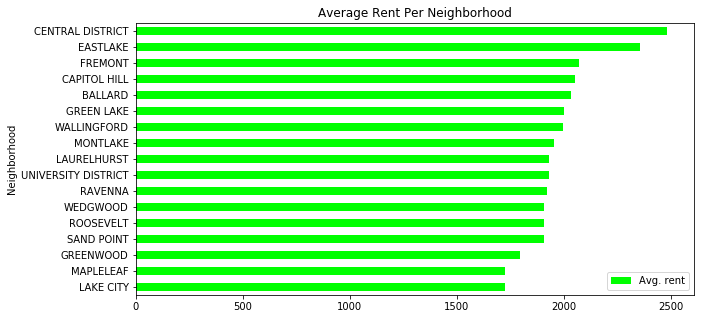

In [130]:
uw_nbhd.sort_values(by = 'Avg. rent', ascending = True, inplace = True)
uw_nbhd.plot.barh(x='Neighborhood',y='Avg. rent', title = 'Average Rent Per Neighborhood', figsize = (10,5), color = 'lime')

We can see that there are some neighborhoods are clearly cheaper than others however, most of them are closely priced. We will take a look at the crime totals before deciding on the best location to stay.

#### Next lets see how each neighborhood compares in regard to total crimes committed with their crime rates.

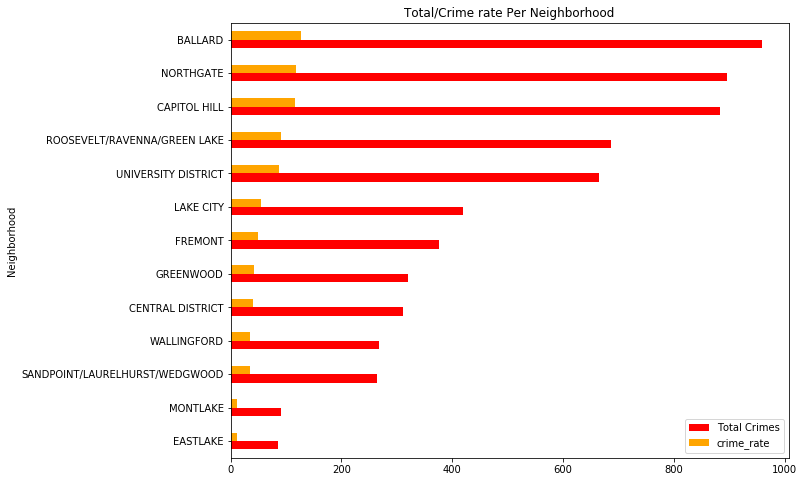

In [131]:
uw_condensed.sort_values(by = 'Total Crimes', ascending = True, inplace = True)
uw_condensed.plot.barh(x='Neighborhood',y=['Total Crimes','crime_rate'],title = 'Total/Crime rate Per Neighborhood', figsize = (10,8), color = ['red','orange'])

##############**REMINDER**###############
#THIS DATAFRAME WAS CONDENSED THEREFORE
#RAVENNA,ROOSEVELT & GREEN LAKE ->ROOSEVELT/RAVENNA/GREEN LAKE
#SAND POINT, LAURELHURST & WEDGWOOD -> SAND POINT/LAURELHURST/WEDGWOOD
#MAPLELEAF -> NORTHGATE
                #** PRIOR CHANGES:**#
#Matthews Beach -> LAKE CITY (uw_list)
#MAGNUSON PARK -> SAND POINT (uw_list)

Though this chart is condensed into smaller neighborhoods, we can see that there are large differences in crime totals when comparing these neighborhoods. For neighborhoods that are combined, it might be a good sign that their crime totals are shared with other areas as it does not guarantee that the crimes were committed in that particular neighborhood but just around that area.

#### Since we are looking for locations that can save incoming college students the most money, we will take a look at the 6 cheapest neighborhoods near UW.


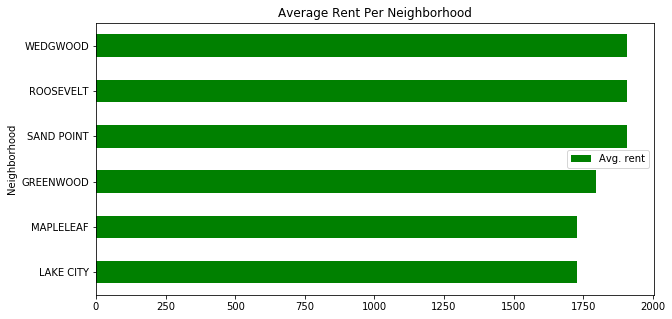

In [132]:
money_saver = uw_nbhd[['Neighborhood','Latitude','Longitude','Avg. rent']]
cheap_nbhds = money_saver.nsmallest(6, 'Avg. rent')
cheap_nbhds.sort_values(by = 'Avg. rent', ascending = True, inplace = True)
cheap_nbhds.plot.barh(x='Neighborhood',y='Avg. rent',title = 'Average Rent Per Neighborhood', figsize = (10,5), color = 'green')

#### Lets take a closer look at these neighborhoods

##### Lets visualize at their crime totals

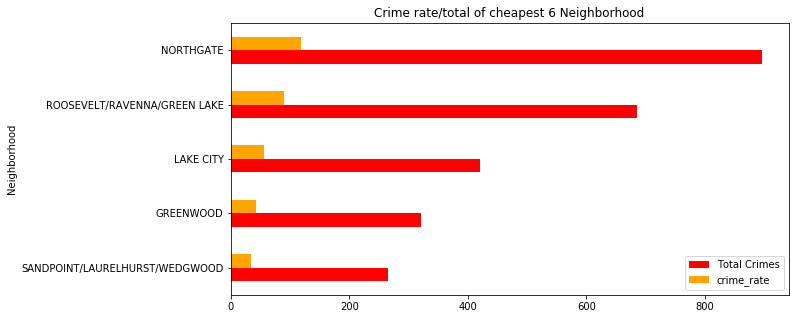

In [133]:
#RAVENNA,ROOSEVELT & GREEN LAKE ->ROOSEVELT/RAVENNA/GREEN LAKE
#SAND POINT, LAURELHURST & WEDGWOOD -> SAND POINT/LAURELHURST/WEDGWOOD
#MAPLELEAF -> NORTHGATE
                #** PRIOR CHANGES:**#
#Matthews Beach -> LAKE CITY (uw_list)
#MAGNUSON PARK -> SAND POINT (uw_list)

df = uw_condensed[['Neighborhood','Latitude','Longitude',
                                  'Total Crimes','crime_rate']].set_index('Neighborhood')

dff = df.drop(['EASTLAKE','MONTLAKE','WALLINGFORD','CENTRAL DISTRICT',
              'FREMONT','UNIVERSITY DISTRICT',
               'CAPITOL HILL', 'BALLARD']).reset_index()
dff.sort_values(by = 'Total Crimes', ascending = True, inplace = True)
dff.plot.barh(x='Neighborhood',y=['Total Crimes','crime_rate'],title = 'Crime rate/total of cheapest 6 Neighborhood', figsize = (10,5), color = ['red','orange'])

#### Since the year is not done, it might be best to take a further look into the safety of these neighborhoods by looking at the crime history from 2018.

#### create a new data frame with just the crimes in 2018.

In [137]:
crimes_2018 = crimes[(crimes['Occurred Date'] >= '2018-01-01') & (crimes['Occurred Date'] <= '2018-12-31')]
# Create a new dataframe consisting of necessary columns for analysis
crimes_2k18 = crimes_2018[['Occurred Date','Crime Subcategory','Primary Offense Description','Neighborhood']]
crimes_2k18.head()

crimes_2k18.drop(crimes_2k18[ crimes_2k18['Neighborhood'] == 'UNKNOWN' ].index , inplace=True)
crimes_2k18['Neighborhood'].value_counts()

k18_crimes = pd.DataFrame(crimes_2k18['Neighborhood'].value_counts().reset_index())
k18_crimes.columns = ['Neighborhood', 'Total Crimes']
k18_crimes.index = np.arange(1, len(k18_crimes) + 1)
k18_crimes

k18_crimes = k18_crimes.replace({'UNIVERSITY':'UNIVERSITY DISTRICT',
                                'CENTRAL AREA/SQUIRE PARK':'CENTRAL DISTRICT',
                                'EASTLAKE - WEST' : 'EASTLAKE', 'EASTLAKE - EAST':'EASTLAKE',
                                'BALLARD SOUTH':'BALLARD','BALLARD NORTH':'BALLARD',
                                'SANDPOINT':'SAND POINT','NORTH BEACON HILL':'BEACON HILL',
                                'JUDKINS PARK/NORTH BEACON HILL':'BEACON HILL','MID BEACON HILL':'BEACON HILL',
                                'SOUTH BEACON HILL':'BEACON HILL','NORTH DELRIDGE':'DELRIDGE',
                                'SOUTH DELRIDGE':'DELRIDGE','LAKECITY':'LAKE CITY',
                                'ROOSEVELT/RAVENNA':'ROOSEVELT/RAVENNA/GREEN LAKE',
                                'MONTLAKE/PORTAGE BAY':'MONTLAKE',
                                'SANDPOINT':'SANDPOINT/LAURELHURST/WEDGWOOD'})
k18_crimes =k18_crimes.groupby('Neighborhood').sum().reset_index()
k18_crimes.index = np.arange(1, len(k18_crimes) + 1)

k18_crimes['City'],k18_crimes['State'] = [City, State]
# Rearrange Columns
k18_crimes = k18_crimes[['Neighborhood','City','State','Total Crimes']]


uw_2018 = uw.join(k18_crimes.set_index('Neighborhood'), on = 'Neighborhood')
uw_2018 = uw_2018[['Neighborhood','City','State','Latitude','Longitude',
                'Avg. rent','Total Crimes']]
uw_2018['crime_rate'] = (uw_2018['Total Crimes']/755955)*100000
uw_2018

,Neighborhood,City,State,Latitude,Longitude,Avg. rent,Total Crimes,crime_rate
1,BALLARD,Seattle,Washington,47.676507,-122.386223,2036.000000,3009,398.039566
2,CAPITOL HILL,Seattle,Washington,47.623831,-122.318369,2052.000000,3002,397.113585
3,CENTRAL DISTRICT,Seattle,Washington,47.603110,-122.308270,2484.000000,1060,140.219987
4,EASTLAKE,Seattle,Washington,47.643145,-122.326172,2357.000000,319,42.198279
5,FREMONT,Seattle,Washington,47.650453,-122.349986,2072.000000,1300,171.967908
6,GREENWOOD,Seattle,Washington,47.690981,-122.354877,1798.000000,1102,145.775873
7,LAKE CITY,Seattle,Washington,47.719162,-122.295494,1727.000000,1291,170.777361
8,MONTLAKE,Seattle,Washington,47.641408,-122.303044,1956.000000,309,40.875449
9,NORTHGATE,Seattle,Washington,47.701368,-122.294561,1727.000000,2976,393.674227
10,ROOSEVELT/RAVENNA/GREEN LAKE,Seattle,Washington,47.677704,-122.311842,1944.666667,1968,260.332956


Lets visualize the data for these specific neighborhoods

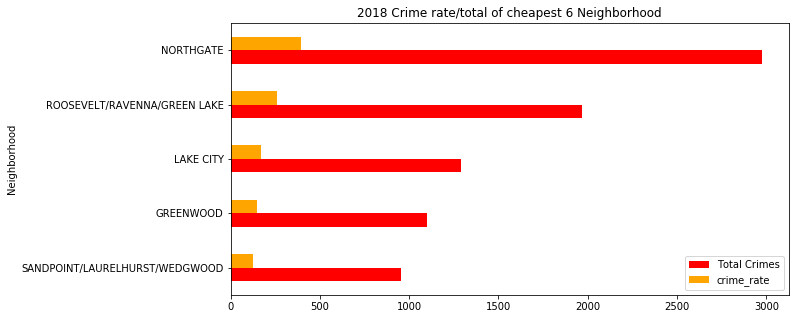

In [135]:
#RAVENNA,ROOSEVELT & GREEN LAKE ->ROOSEVELT/RAVENNA/GREEN LAKE
#SAND POINT, LAURELHURST & WEDGWOOD -> SAND POINT/LAURELHURST/WEDGWOOD
#MAPLELEAF -> NORTHGATE
                #** PRIOR CHANGES:**#
#Matthews Beach -> LAKE CITY (uw_list)
#MAGNUSON PARK -> SAND POINT (uw_list)

dw = uw_2018[['Neighborhood','Latitude','Longitude',
                                  'Total Crimes','crime_rate']].set_index('Neighborhood')

dww = dw.drop(['EASTLAKE','MONTLAKE','WALLINGFORD','CENTRAL DISTRICT',
              'FREMONT','UNIVERSITY DISTRICT',
               'CAPITOL HILL', 'BALLARD']).reset_index()
dww.sort_values(by = 'Total Crimes', ascending = True, inplace = True)
dww.plot.barh(x='Neighborhood',y=['Total Crimes','crime_rate'],title = '2018 Crime rate/total of cheapest 6 Neighborhood', figsize = (10,5), color = ['red','orange'])

#### From the looks of this graph, the characteristics are near identical to the initial graph. We can therefore proceed with the observation.

#### Now lets compare venues for each respective neighborhood.

In [136]:
sea_venues = sea_merged.set_index('Neighborhood')
venue_comparisons = sea_venues.loc[['LAKE CITY','MAPLELEAF','GREENWOOD','SAND POINT',
                                    'ROOSEVELT','WEDGWOOD']].T
venue_comparisons

Neighborhood,LAKE CITY,MAPLELEAF,GREENWOOD,SAND POINT,ROOSEVELT,WEDGWOOD
City,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle
State,Washington,Washington,Washington,Washington,Washington,Washington
Latitude,47.7192,47.7014,47.691,47.6824,47.6773,47.6903
Longitude,-122.295,-122.295,-122.355,-122.264,-122.314,-122.291
Avg. rent,1727,1727,1798,1909,1909,1909
Cluster Labels,0,2,0,1,0,0
1st Most Common Venue,Pharmacy,Bus Line,Coffee Shop,Park,Coffee Shop,Park
2nd Most Common Venue,Bank,Marijuana Dispensary,Mexican Restaurant,Soccer Field,Bar,Coffee Shop
3rd Most Common Venue,Mexican Restaurant,Liquor Store,Spa,Playground,Vegetarian / Vegan Restaurant,Pub
4th Most Common Venue,Thai Restaurant,Furniture / Home Store,Bookstore,Tennis Court,Burger Joint,Pharmacy


## Results & Discussion

This analysis showed that there are some great options as to where some students can live that is in close proximity to UWs' medical center that is on the campus. The rental costs showed that the neighborhoods were fairly close in range with a few options that were more cheaper as well as a few options that were more expensive. With the basis of this analysis focusing on identifying the most cost-efficient neighborhoods around the University of Washington within the city of Seattle, we narrowed our focus down to six cheapest options, Wedgwood, Roosevelt, Mapeleaf, Sand Point, Greenwood and Lake City. 
These neighborhoods make the most economical sense if trying to live near UWs' campus.

Though rental costs is the main focus for this analysis, this feature alone would not suffice when suggesting a place to stay for incoming students. The safety of the new neighborhood they are considering living in was the next point of focus. Using the crime dataframe, a bar graph was created  to compare how much safer some of the cheaper neighborhoods of focus could be than the others. From this graph we observed that two particular neighborhoods were not only top three in rental price, they are also in the top three in low crime totals and they were, Wedgwood and Lake City. Though these neighborhoods present an ideal environment for students, being that they are the more cheaper and safer neighborhoods, this does not imply that these locations in particular will be the best choice for them. This analysis only serves as a foundation or guide for students looking to live in the area.


## Conclusion

As previously expressed, the purpose of this project was to identify the most cost-efficient neighborhoods within a four mile radius (North, South, East, West) of the UW Medical Center/UWSOM on campus in the city of Seattle. This analysis' intent was to provide an informative outlook on the many neighborhoods which  in turn will aid college students and their families decision on where they should stay, based on their interests and or needs. This analysis began with obtaining the necessary data, average rental costs and crime totals, to  analize the neighborhoods. Next, the data was reaarranged, modified and cleaned of any unwanted data that would not serve a purpose for this analysis. Coordinates of the neighborhoods were then obtained using the geopy libraries which in turn provided us with the capability of retrieving their top venues and clustering those locations using Foursquare. 

Based off of the data that was collected for this project, This analysis concluded that safest and cheapest neighborhoods for a incoming college student to stay are, Lake City, which had the cheapest rental cost of 1727.00 with a total of 420 crimes committed currently in the year, Greenwood, which had the third lowest rental cost of 1798.00 with the second lowest crime total of 321 crimes committed currently in the year and with a tie, Sandpoint and Wedgwood bothing costing the most out of the 6 cheaper neighborhoods with a cost of 1909.00 with the lowest crime total,that is split between the neighborhoods along with Laurelhurst at, of 265 crimes currently committed in the year. All of these neighborhoods provide a plethora of venues to go to however, as far as necessities may go and safety, Wedgwood may be the most optimal neighborhood to stay providing all of the necessary venues within the neighborhood; Having venues such as Coffee Shop, Pharmacy, bank, supermarket, gym and more. This does not serve as a final decision for the stakeholders but an aid for their own decision.